## Laden Module

In [1]:
import pandas as pd                                                
import matplotlib.pyplot as plt                                    
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from graphviz import Source
from sklearn.tree import export_graphviz

## Laden der Daten

In [2]:
titanic_data = pd.read_csv('/content/sample_data/titanic_data.csv', sep = ';', decimal = ',')

## Data Understanding

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    object 
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   Embarked     891 non-null    object 
 4   FamilySize   891 non-null    int64  
 5   GenderClass  891 non-null    object 
 6   Survived     891 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


Pclass: Passagier-Klasse (P1, P2, P3)



Age: Alter

Fare: Ticketpreis

Embarked: Hafen der Einschiffung (C = Cherbourg; Q = Queenstown; S = Southampton) 

FamilySize: Anzahl der Familienmitglieder  

GenderClass: Geschlecht oder Kind (male, female,  child)

Survived: Label (0: nicht überlebt, 1: überlebt)

In [4]:
titanic_data.describe()

,Age,Fare,FamilySize,Survived
count,891.000000,891.000000,891.000000,891.000000
mean,29.361582,32.447545,1.904602,0.383838
std,13.019697,49.570235,1.613459,0.486592
min,0.420000,4.012500,1.000000,0.000000
25%,22.000000,7.925000,1.000000,0.000000
50%,28.000000,14.454200,1.000000,0.000000
75%,35.000000,31.000000,2.000000,1.000000
max,80.000000,512.329200,11.000000,1.000000


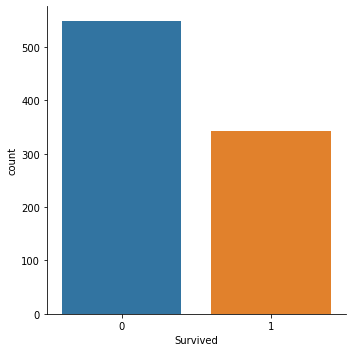

In [5]:
sns.catplot(data = titanic_data, x = 'Survived', kind='count')

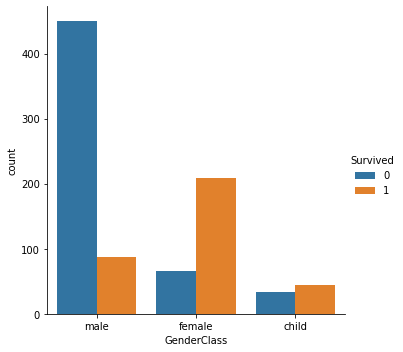

In [6]:
sns.catplot(data = titanic_data, x = 'GenderClass', hue = 'Survived',
            kind='count')

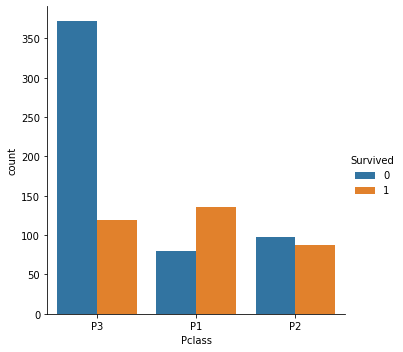

In [7]:
sns.catplot(data = titanic_data, x = 'Pclass', hue = 'Survived',
            kind='count')

## Data Preparation

In [8]:
titanic = pd.get_dummies(titanic_data, columns=['Pclass', 'GenderClass','Embarked'])
X = titanic.loc[:,titanic.columns != 'Survived']
y = titanic.Survived 


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [10]:
print(X_train.shape)
print(y_train.shape)

(712, 12)
(712,)


## Modeling

In [11]:
model_1 = DecisionTreeClassifier(random_state = 0)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
graph_1 = Source( export_graphviz(model_1, 
                                  out_file=None,
                                  filled=True,
                                  rounded=True,  
                                  special_characters=True, 
                                  feature_names=X.columns))
graph_1.format = 'png'
graph_1.render('model_1',view = True)

'model_1.png'

## Evaluation

In [13]:
y_pred_train_1 = model_1.predict(X_train)  
y_pred_test_1 = model_1.predict(X_test)
print('Accuracy Score Train Data:', accuracy_score(y_train,y_pred_train_1))
print('Accuracy Score Test Data:', accuracy_score(y_test,y_pred_test_1))


Accuracy Score Train Data: 0.9873595505617978
Accuracy Score Test Data: 0.776536312849162


In [14]:
confusion_matrix_1 = pd.DataFrame(confusion_matrix(y_test, y_pred_test_1))

confusion_matrix_1.index = ['nicht überlebt','überlebt']
confusion_matrix_1.columns = ['Vorhersage nicht überlebt','Vorhersage überlebt']
print(confusion_matrix_1)

                Vorhersage nicht überlebt  Vorhersage überlebt
nicht überlebt                         90                   16
überlebt                               24                   49


## Optimierung: Hyperparameteroptimierung

In [15]:
params = {
    'criterion':['gini','entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [2, 3, 4, 5, 6],
    }

In [16]:
grid_1 = GridSearchCV(model_1, 
                      param_grid = params, 
                      cv=5,
                      verbose = 2)

grid_1.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=4; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6]},
             verbose=2)

In [17]:
grid_1.best_estimator_ 

DecisionTreeClassifier(max_depth=6, max_features=5, random_state=0)

In [18]:
model_2 = DecisionTreeClassifier(random_state = 0,
                                         max_depth = 6,
                                         max_features = 5)
model_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=5, random_state=0)

In [19]:
graph_2 = Source( export_graphviz(model_2, 
                                  out_file=None,
                                  filled=True,
                                  rounded=True,  
                                  special_characters=True, 
                                  feature_names=X.columns))
graph_2.format = 'png'
graph_2.render('model_2',view = True)

'model_2.png'

In [20]:
y_pred_train_2 = model_2.predict(X_train)  
y_pred_test_2 = model_2.predict(X_test)
print('Accuracy Score Train Data:', accuracy_score(y_train,y_pred_train_2))
print('Accuracy Score Test Data:', accuracy_score(y_test,y_pred_test_2))

Accuracy Score Train Data: 0.8693820224719101
Accuracy Score Test Data: 0.7821229050279329


In [21]:
confusion_matrix_2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test_2))

confusion_matrix_2.index = ['nicht überlebt','überlebt']
confusion_matrix_2.columns = ['Vorhersage nicht überlebt','Vorhersage überlebt']
print(confusion_matrix_2)

                Vorhersage nicht überlebt  Vorhersage überlebt
nicht überlebt                        100                    6
überlebt                               33                   40


## Optimierung 2: Feature Selection & Hyperparameteroptimierung

In [22]:
X_train_2 = X_train.drop(['Pclass_P1', 'Pclass_P2'], axis = 1)
X_test_2 = X_test.drop(['Pclass_P1', 'Pclass_P2'], axis = 1)

grid_2 = GridSearchCV(model_1, 
                      param_grid = params,
                      scoring = 'roc_auc',
                      cv=5,
                      verbose = 2)

grid_2.fit(X_train_2, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=2; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=3; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, max_features=4; total time=   0.0s
[CV] END ........criterion=gini, max_depth=2, m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6]},
             scoring='roc_auc', verbose=2)

In [23]:
grid_2.best_estimator_ 

DecisionTreeClassifier(max_depth=4, max_features=6, random_state=0)

In [24]:
model_3 = DecisionTreeClassifier(random_state = 0,
                                         max_depth = 4,
                                         max_features = 6)
model_3.fit(X_train_2, y_train)

DecisionTreeClassifier(max_depth=4, max_features=6, random_state=0)

In [25]:
graph_3 = Source( export_graphviz(model_3, 
                                  out_file=None,
                                  filled=True,
                                  rounded=True,  
                                  special_characters=True, 
                                  feature_names=X.drop(['Pclass_P1', 'Pclass_P2'], axis = 1).columns))
graph_3.format = 'png'
graph_3.render('model_3',view = True)

'model_3.png'

In [26]:
y_pred_train_3 = model_3.predict(X_train_2)  
y_pred_test_3 = model_3.predict(X_test_2)
print('Accuracy Score Train Data:', accuracy_score(y_train, y_pred_train_3))
print('Accuracy Score Test Data:', accuracy_score(y_test, y_pred_test_3))

Accuracy Score Train Data: 0.8441011235955056
Accuracy Score Test Data: 0.8100558659217877


In [27]:
confusion_matrix_3 = pd.DataFrame(confusion_matrix(y_test, y_pred_test_3))

confusion_matrix_3.index = ['nicht überlebt','überlebt']
confusion_matrix_3.columns = ['Vorhersage nicht überlebt','Vorhersage überlebt']
print(confusion_matrix_3)

                Vorhersage nicht überlebt  Vorhersage überlebt
nicht überlebt                         95                   11
überlebt                               23                   50
